In [1]:
import numpy as np
import matplotlib.pyplot as plt

# used for ipython notebook to display the output of plotting within frontend
%matplotlib inline 

The dataset include the data of red wine samples. The goal is to model wine quality which is the last column.

In [2]:
data = np.genfromtxt('winequality.csv', skip_header = 1, delimiter = ';')

In [3]:
data

array([[  1.63598443e+03,   7.00000000e-01,   0.00000000e+00, ...,
          5.60000000e-01,   9.40000000e+00,   5.00000000e+00],
       [  2.44060198e+03,   8.80000000e-01,   0.00000000e+00, ...,
          6.80000000e-01,   9.80000000e+00,   5.00000000e+00],
       [  2.44060198e+03,   7.60000000e-01,   4.00000000e-02, ...,
          6.50000000e-01,   9.80000000e+00,   5.00000000e+00],
       ..., 
       [  8.97847292e+02,   7.75000000e-01,   0.00000000e+00, ...,
          5.60000000e-01,   1.07000000e+01,   5.00000000e+00],
       [  1.09663316e+03,   5.00000000e-01,   2.50000000e-01, ...,
          6.30000000e-01,   9.20000000e+00,   5.00000000e+00],
       [  1.99819589e+03,   9.00000000e-01,   6.00000000e-02, ...,
          5.60000000e-01,   9.80000000e+00,   5.00000000e+00]])

In [4]:
print('shape of the data is [%d, %d]' % data.shape)

shape of the data is [99, 12]


data visualization

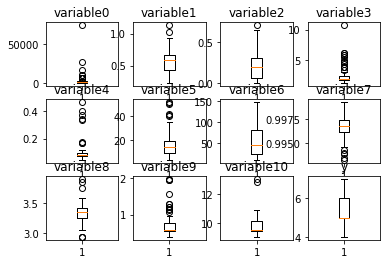

In [5]:
for index in range(12):
    plt.subplot(3, 4, index + 1)
    plt.boxplot(data[:, index])
    if index == 11:
        plt.title('y')
    else:
        plt.title('variable' + str(index))

If some variable has skewed distribution, see whether we can apply transformation like log.

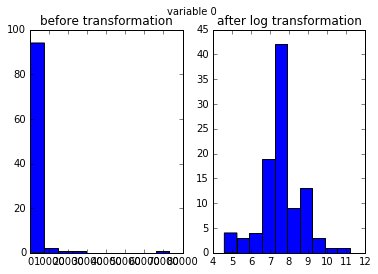

In [6]:
plt.subplot(1, 2, 1)
plt.hist(data[:, 0], bins = 10)
plt.title('before transformation')

plt.subplot(1, 2, 2)
plt.hist(np.log(data[:, 0]), bins = 10)
plt.title('after log transformation')

plt.suptitle('variable 0')

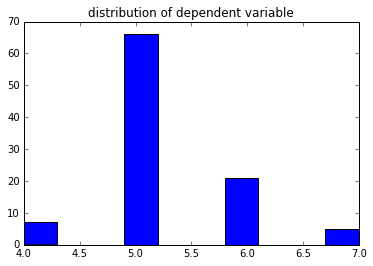

In [7]:
plt.hist(data[:, -1])
plt.title('distribution of dependent variable')

In [8]:
data[:, 0] = np.log(data[:, 0])
data

array([[  7.4  ,   0.7  ,   0.   , ...,   0.56 ,   9.4  ,   5.   ],
       [  7.8  ,   0.88 ,   0.   , ...,   0.68 ,   9.8  ,   5.   ],
       [  7.8  ,   0.76 ,   0.04 , ...,   0.65 ,   9.8  ,   5.   ],
       ..., 
       [  6.8  ,   0.775,   0.   , ...,   0.56 ,  10.7  ,   5.   ],
       [  7.   ,   0.5  ,   0.25 , ...,   0.63 ,   9.2  ,   5.   ],
       [  7.6  ,   0.9  ,   0.06 , ...,   0.56 ,   9.8  ,   5.   ]])

Test whether the predictors are highly correlated.

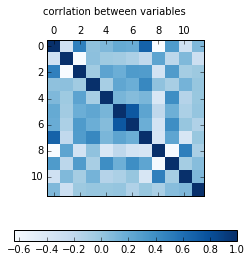

In [9]:
corrcoef = np.corrcoef(data.T)
plt.matshow(corrcoef, cmap=plt.cm.Blues)
plt.colorbar(orientation='horizontal')
plt.suptitle('corrlation between variables')
plt.show()

add intercept term

In [10]:
data = np.hstack((np.ones((data.shape[0], 1)), data))
data

array([[  1.   ,   7.4  ,   0.7  , ...,   0.56 ,   9.4  ,   5.   ],
       [  1.   ,   7.8  ,   0.88 , ...,   0.68 ,   9.8  ,   5.   ],
       [  1.   ,   7.8  ,   0.76 , ...,   0.65 ,   9.8  ,   5.   ],
       ..., 
       [  1.   ,   6.8  ,   0.775, ...,   0.56 ,  10.7  ,   5.   ],
       [  1.   ,   7.   ,   0.5  , ...,   0.63 ,   9.2  ,   5.   ],
       [  1.   ,   7.6  ,   0.9  , ...,   0.56 ,   9.8  ,   5.   ]])

Train test split

In [11]:
data_index = list(range(data.shape[0]))
np.random.seed(100) # set up random seed to reproduce the result in the future
np.random.shuffle(data_index) # shuffle the index in place

train_test_split = .8
train_sample_size = int(train_test_split * data.shape[0])
train_index, test_index = data_index[:train_sample_size], data_index[train_sample_size:]

X_train, y_train = data[train_index, :-1], data[train_index, -1]
X_test, y_test = data[test_index, :-1], data[test_index, -1]

Train linear regression model

In [12]:
def linearRegression(X, y):
    # w = (X^T*X)^{-1}*X^T*y
    var = np.dot(X.T, X)
    cov = np.dot(X.T, y)
    w = np.dot(np.linalg.inv(var), cov)
    return w

In [13]:
def plotPrediction(y, y_pred, title = 'train set'):
    plt.scatter(y, y_pred)
    plt.plot([min(y), max(y)], [min(y), max(y)], '--')
    plt.xlabel('true value')
    plt.ylabel('predicted value')
    plt.title(title)

In [14]:
def MSE(y, y_pred):
    return np.mean((y - y_pred) ** 2)

In [15]:
w = linearRegression(X_train, y_train)

MSE is 0.3066


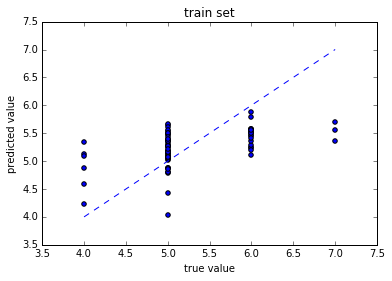

In [16]:
y_train_predict = np.dot(X_train, w)
train_mse = MSE(y_train, y_train_predict)
print('MSE is %.4f' % train_mse)
plotPrediction(y_train, y_train_predict)

MSE is 0.3797


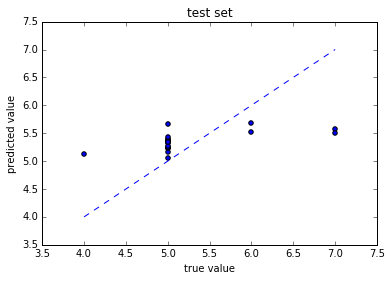

In [17]:
y_test_predict = np.dot(X_test, w)
test_mse = MSE(y_test, y_test_predict)
print('MSE is %.4f' % test_mse)
plotPrediction(y_test, y_test_predict, 'test set')

underfitting vs overfitting

In [18]:
# use the lists to record number of features, MSE for train and test set respectively
num_features, mses_train, mses_test = [], [], []

In [19]:
for num in range(2, X_train.shape[1] + 1):
    num_features.append(num)
    
    X_train_tmp, X_test_tmp = data[train_index, :num], data[test_index, :num]
    w_tmp = linearRegression(X_train_tmp, y_train)
    
    y_train_predict_tmp = np.dot(X_train_tmp, w_tmp)
    mses_train.append(MSE(y_train, y_train_predict_tmp))
    
    y_test_predict_tmp = np.dot(X_test_tmp, w_tmp)
    mses_test.append(MSE(y_test, y_test_predict_tmp))

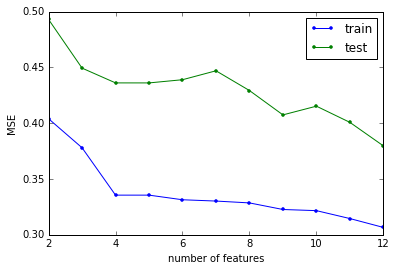

In [20]:
plt.plot(num_features, mses_train, marker = '.')
plt.plot(num_features, mses_test, marker = '.')
plt.legend(['train', 'test'])
plt.xlabel('number of features')
plt.ylabel('MSE')

When the number of features is small, the model build is simple and can not follow the data pattern. The model has underfitting problem. 

As more features are introduced, the MSE of both train and test set decreases. The performance of the model improves.

Introduce x^2 as additional features.

In [21]:
X_train_squared, X_test_squared = np.hstack((X_train, X_train[:, 1:] **2)), np.hstack((X_test, X_test[:, 1:] **2))
w_squared = linearRegression(X_train_squared, y_train)

y_train_predict_squared = np.dot(X_train_squared, w_squared)
mses_train.append(MSE(y_train, y_train_predict_squared))

y_test_predict_squared = np.dot(X_test_squared, w_squared)
mses_test.append(MSE(y_test, y_test_predict_squared))

num_features.append(X_train_squared.shape[1])

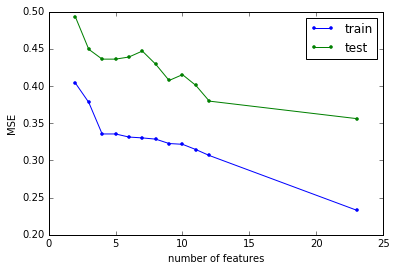

In [22]:
plt.plot(num_features, mses_train, marker = '.')
plt.plot(num_features, mses_test, marker = '.')
plt.legend(['train', 'test'])
plt.xlabel('number of features')
plt.ylabel('MSE')

Introduce x1 * x2 terms as additional features.

In [23]:
def addInteraction(X):
    feature = X.shape[1]
    X_interaction = np.zeros((X.shape[0], int(feature * (feature - 1) / 2)))
    col = 0
    for i in range(feature):
        for j in range(i + 1, feature):
            X_interaction[:, col] = X[:, i] * X[:, j]
            col += 1
    return X_interaction

In [24]:
X_train_interaction = np.hstack((X_train, addInteraction(X_train[:, 1:])))
X_test_interaction = np.hstack((X_test, addInteraction(X_test[:, 1:])))
w_interaction = linearRegression(X_train_interaction, y_train)

y_train_predict_interaction = np.dot(X_train_interaction, w_interaction)
mses_train.append(MSE(y_train, y_train_predict_interaction))

y_test_predict_interaction = np.dot(X_test_interaction, w_interaction)
mses_test.append(MSE(y_test, y_test_predict_interaction))

num_features.append(X_train_interaction.shape[1])

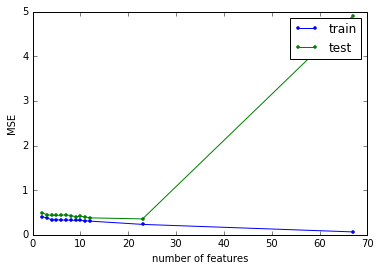

In [25]:
plt.plot(num_features, mses_train, marker = '.')
plt.plot(num_features, mses_test, marker = '.')
plt.legend(['train', 'test'])
plt.xlabel('number of features')
plt.ylabel('MSE')

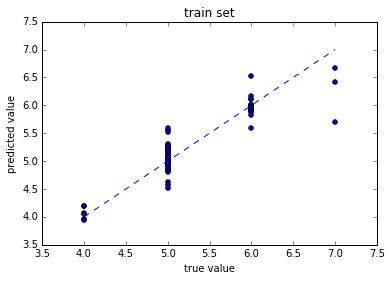

In [26]:
plotPrediction(y_train, y_train_predict_interaction)

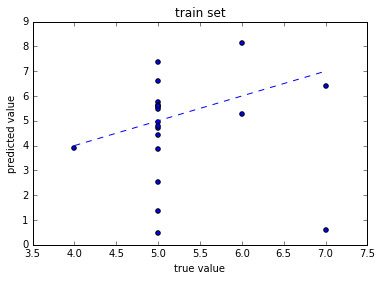

In [27]:
plotPrediction(y_test, y_test_predict_interaction)

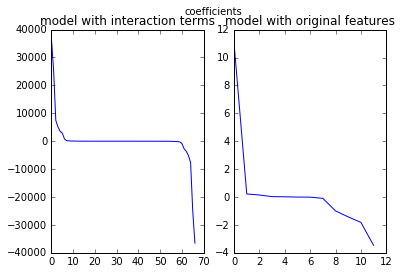

In [28]:
plt.subplot(1, 2, 1)
plt.plot(np.sort(w_interaction)[::-1])
plt.title('model with interaction terms')
plt.subplot(1, 2, 2)
plt.plot(np.sort(w)[::-1])
plt.title('model with original features')
plt.suptitle('coefficients')

When the number of features is big, the model has the overfitting problem. The performance is good with train set, but bad with test set. And some coefficients are very large.

Treat the overfitting problem

In [29]:
def linearRegressionReg(X, y, lamb = 1.0):
    # w = (X^T*X + lambda * I)^{-1}*X^T*y
    var = np.dot(X.T, X) + np.eye(X.shape[1]) * lamb
    cov = np.dot(X.T, y)
    w = np.dot(np.linalg.inv(var), cov)
    return w

In [30]:
print('with no regularization, MSE of train set is %.4f, MSE of test set is %.4f' % 
      (MSE(y_train, y_train_predict_interaction), MSE(y_test, y_test_predict_interaction)))

w_interaction_reg = linearRegressionReg(X_train_interaction, y_train)

y_train_predict_interaction_reg = np.dot(X_train_interaction, w_interaction_reg)
y_test_predict_interaction_reg = np.dot(X_test_interaction, w_interaction_reg)
print('with regularization, MSE of train set is %.4f, MSE of test set is %.4f' % 
      (MSE(y_train, y_train_predict_interaction_reg), MSE(y_test, y_test_predict_interaction_reg)))

with no regularization, MSE of train set is 0.0649, MSE of test set is 4.9082
with regularization, MSE of train set is 0.1765, MSE of test set is 0.7120


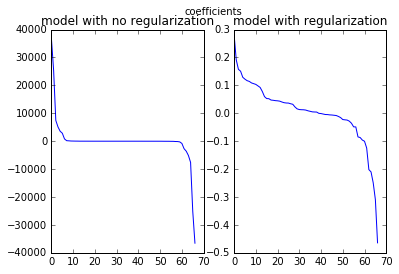

In [31]:
plt.subplot(1, 2, 1)
plt.plot(np.sort(w_interaction)[::-1])
plt.title('model with no regularization')
plt.subplot(1, 2, 2)
plt.plot(np.sort(w_interaction_reg)[::-1])
plt.title('model with regularization')
plt.suptitle('coefficients')